In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

All_filename = "All.csv"  
df_all = pd.read_csv(All_filename)
Active_filename = "Active.csv"  
df_active = pd.read_csv(Active_filename)
Lazy_filename = "Lazy.csv"  
df_lazy = pd.read_csv(Lazy_filename)

# All

In [46]:
import matplotlib.pyplot as plt
import pandas as pd

def plotESDvsCarga_V2(df, x, y, point_size=5, avg_marker_size=10, error_bar_thickness=1, 
                      title="Plot Title", xlabel="X-axis Label", ylabel="Y-axis Label"):
    """
    Plots data points from a DataFrame along with averages and standard deviations for each unique 'carga',
    and includes mean and standard deviation values in a legend-like table in the upper-right corner of the plot.

    Parameters:
        df (pd.DataFrame): DataFrame containing the data.
        x (str): Column name for the x-axis data.
        y (str): Column name for the y-axis data.
        point_size (int): Size of the data points.
        avg_marker_size (int): Size of the markers for the average values.
        error_bar_thickness (float): Thickness of the error bars.
        title (str): Title of the plot.
        xlabel (str): Label for the x-axis.
        ylabel (str): Label for the y-axis.
    """
    # Ensure the DataFrame contains the specified columns
    if x not in df.columns or y not in df.columns:
        print(f"Error: One or both columns '{x}' or '{y}' are not in the DataFrame.")
        return
    
    # Plot data points
    plt.plot(df[x], df[y], marker='.', linestyle='', markersize=point_size, color='green', label='_nolegend_')

    # Calculate average and standard deviation for each carga
    stats = df.groupby('carga')[y].agg(['mean', 'std']).reset_index()

    # Plot average values with error bars for standard deviation
    plt.errorbar(
        stats['carga'], stats['mean'], yerr=stats['std'],
        fmt='x', color='red', markersize=avg_marker_size,
        ecolor='black', elinewidth=error_bar_thickness, capsize=4,
        label='_nolegend_'
    )

    # Create the custom legend text with aligned header and data rows
    legend_text = f"{'Carga':<6} {'Promedio':<10} {'STD':<6}\n" + "\n".join(
        [f"{int(row['carga']):<6} {row['mean']:<10.2f} {row['std']:<6.2f}" for _, row in stats.iterrows()]
    )

    # Place the legend in the upper-right corner of the plot area
    ax = plt.gca()  # Get the current Axes instance
    ax.text(
        0.95, 0.95, legend_text, transform=ax.transAxes, family="monospace",
        ha="right", va="top", bbox=dict(facecolor='white', alpha=0.7)
    )

    # Customize plot appearance
    plt.xlabel(xlabel)  
    plt.ylabel(ylabel)  
    plt.title(title)
    plt.grid(True)

    plt.show()


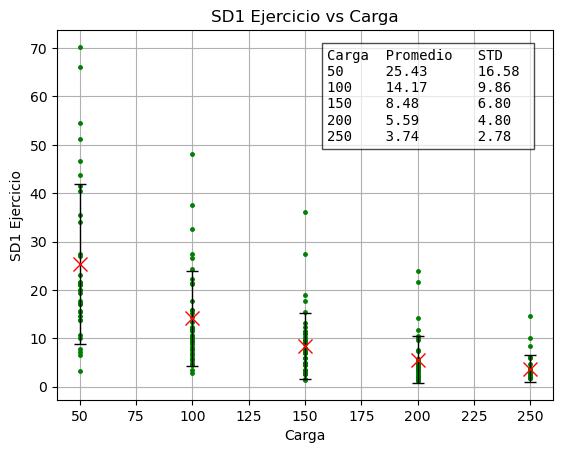

In [48]:
df_all = pd.read_csv(All_filename)

df_all = df_all[df_all['Filename'] != 'CAMV100W.txt']
new_order = ['Filename',
             'Rest Mean','Rest Std',
             'Exercise Mean','Exercise Std',
             'Recovery Mean', 'Recovery Std',
             'Rest SD1', 'Rest SD2',
             'Exercise SD1','Exercise SD2',
             'Recovery SD1', 'Recovery SD2',
            ]  
df_all= df_all.reindex(columns=new_order)
#df_all_dropped = df_all.drop(df_all.columns[0], axis=1)
df_all['carga'] = df_all['Filename'].str.extract(r'(\d+)')

cols = df_all.columns.tolist()  # Get a list of column names
cols.insert(1, cols.pop(cols.index('carga')))  # Move 'carga' to the second position
# Apply the new order
df_all= df_all[cols]

values = ['400','130','160','300','350']

df_all = df_all[~df_all['carga'].isin(values)]
df_all['carga'] = df_all['carga'].astype(int)

df_all = df_all.sort_values(by='carga', ascending=True)

# Drop rows where `carga == 200` and `Exercise SD1 > 100`
df_all = df_all[~((df_all['carga'] == 200) & (df_all['Exercise SD1'] > 100))]

# Drop rows where `carga == 250` and `Exercise SD1 > 100`
df_all = df_all[~((df_all['carga'] == 250) & (df_all['Exercise SD1'] > 100))]

# Example usage
plotESDvsCarga_V2(
    df_all, 
    x="carga", 
    y="Exercise SD1", 
    title="SD1 Ejercicio vs Carga", 
    xlabel="Carga", 
    ylabel="SD1 Ejercicio"
)



#plotESDvsCarga_V2(df_all, 'carga', 'Exercise SD1')

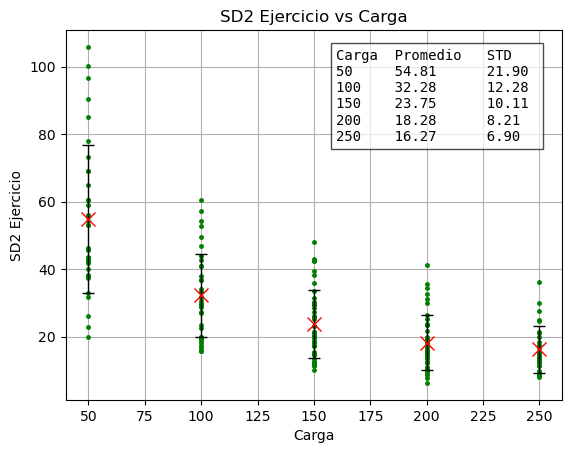

In [50]:
df_all = pd.read_csv(All_filename)

df_all = df_all[df_all['Filename'] != 'CAMV100W.txt']
new_order = ['Filename',
             'Rest Mean','Rest Std',
             'Exercise Mean','Exercise Std',
             'Recovery Mean', 'Recovery Std',
             'Rest SD1', 'Rest SD2',
             'Exercise SD1','Exercise SD2',
             'Recovery SD1', 'Recovery SD2',
            ]  
df_all= df_all.reindex(columns=new_order)
#df_all_dropped = df_all.drop(df_all.columns[0], axis=1)
df_all['carga'] = df_all['Filename'].str.extract(r'(\d+)')

cols = df_all.columns.tolist()  # Get a list of column names
cols.insert(1, cols.pop(cols.index('carga')))  # Move 'carga' to the second position
# Apply the new order
df_all= df_all[cols]

values = ['400','130','160','300','350']

df_all = df_all[~df_all['carga'].isin(values)]
df_all['carga'] = df_all['carga'].astype(int)

df_all = df_all.sort_values(by='carga', ascending=True)


df_all = df_all[~((df_all['carga'] == 50) & (df_all['Exercise SD2'] > 110))]

df_all = df_all[~((df_all['carga'] == 100) & (df_all['Exercise SD2'] > 80))]

df_all = df_all[~((df_all['carga'] == 200) & (df_all['Exercise SD2'] > 60))]

df_all = df_all[~((df_all['carga'] == 250) & (df_all['Exercise SD2'] > 60))]


# Example usage
plotESDvsCarga_V2(
    df_all, 
    x="carga", 
    y="Exercise SD2", 
    title="SD2 Ejercicio vs Carga", 
    xlabel="Carga", 
    ylabel="SD2 Ejercicio"
)

#plotESDvsCarga_V2(df_all, 'carga', 'Exercise SD2')

# Active

In [40]:
Active_filename = "Active.csv"  
df_active = pd.read_csv(Active_filename)
df_active = df_active[df_active['Filename'] != 'CAMV100W.txt']
df_active['carga'] = df_active['Filename'].str.extract(r'(\d+)')


cols = df_active.columns.tolist()  # Get a list of column names
cols.insert(1, cols.pop(cols.index('carga')))  # Move 'carga' to the second position
# Apply the new order
df_active = df_active[cols]
df_active.head()

,Filename,carga,Rest Mean,Rest Std,Rest SD1,Rest SD2,Exercise Mean,Exercise Std,Exercise SD1,Exercise SD2,Recovery Mean,Recovery Std,Recovery SD1,Recovery SD2
0,VPS50W.txt,50,970.106796,93.833521,67.378896,113.794735,798.254335,68.725382,46.736387,85.000683,957.920128,86.876377,57.678222,108.686750
1,VPS100W.txt,100,811.615385,77.478406,36.154846,103.436815,621.000000,23.269507,8.218215,31.891050,782.152231,76.605393,29.903111,103.768439
2,VPS150Wtts.txt,150,861.768116,87.234341,46.305357,114.346792,577.589595,21.757358,4.904690,30.214064,875.413994,77.813622,41.920159,101.487171
3,VPS200W.txt,200,882.055882,70.479199,40.918276,90.800665,550.338828,19.052093,4.586678,26.553690,983.215686,107.617693,64.846452,137.846818
4,VPS250W.txt,250,803.573727,70.201724,28.918383,94.998882,423.642553,21.307273,2.139987,30.067643,699.766900,61.394492,17.973696,84.985313


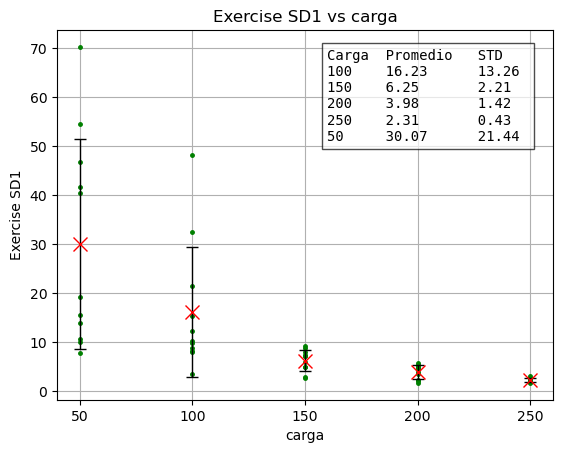

In [41]:
plotESDvsCarga_V2(df_active, 'carga', 'Exercise SD1')

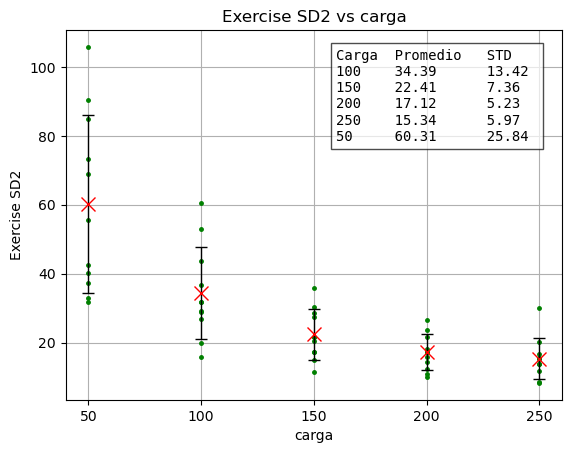

In [42]:
plotESDvsCarga_V2(df_active, 'carga', 'Exercise SD2')

# Lazy

In [43]:
Lazy_filename = "Lazy.csv"  
df_lazy = pd.read_csv(Lazy_filename)
df_lazy = df_lazy[df_lazy['Filename'] != 'CAMV100W.txt']
df_lazy['carga'] = df_lazy['Filename'].str.extract(r'(\d+)')


cols = df_lazy.columns.tolist()  # Get a list of column names
cols.insert(1, cols.pop(cols.index('carga')))  # Move 'carga' to the second position
# Apply the new order
df_lazy = df_lazy[cols]
df_lazy.head()

,Filename,carga,Rest Mean,Rest Std,Rest SD1,Rest SD2,Exercise Mean,Exercise Std,Exercise SD1,Exercise SD2,Recovery Mean,Recovery Std,Recovery SD1,Recovery SD2
0,YARV50Wtts.txt,50,708.306604,60.228342,25.742175,81.277542,636.040340,35.401915,19.918104,45.938042,718.397129,65.380192,29.111174,87.734538
1,YARV100W.txt,100,648.653061,44.909784,15.063540,61.640560,543.876838,14.559131,7.604884,19.149406,690.960465,48.803506,22.797017,65.109631
2,YARV150W.txt,150,676.725000,38.940623,13.334150,53.477826,467.123924,10.583906,2.897829,14.687864,627.213508,28.871403,11.300433,39.279256
3,YARV200W.txt,200,607.449393,30.549099,10.815294,41.822764,387.621447,6.818436,1.357267,9.541790,555.467290,21.632840,6.649463,29.851814
4,CAMV50W.txt,50,643.359140,65.168186,25.835583,88.476684,588.374257,40.387976,21.187256,53.100795,631.640000,59.831015,28.331670,79.685788


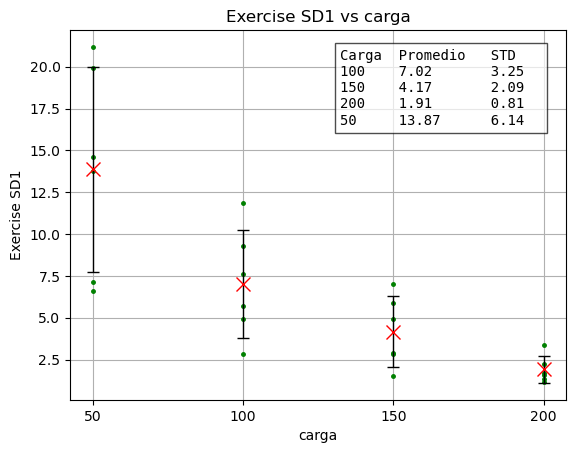

In [44]:
plotESDvsCarga_V2(df_lazy, 'carga', 'Exercise SD1')

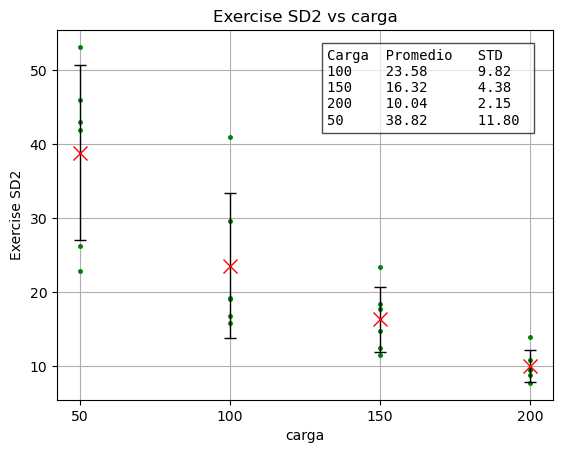

In [45]:
plotESDvsCarga_V2(df_lazy, 'carga', 'Exercise SD2')